In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Assessment
!ls updated_pollution_dataset.csv

Mounted at /content/drive
/content/drive/MyDrive/Assessment
updated_pollution_dataset.csv


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [6]:
#Load dataset
df = pd.read_csv('updated_pollution_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [9]:
print("\nDataset Description:")
display(df.describe())


Dataset Description:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [10]:
# List all attributes
print("\nAttributes in the dataset:")
print(df.columns.tolist())


Attributes in the dataset:
['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density', 'Air Quality']


#Data info
- The dataset is about Pollution, which aligns with UNSDG Goal 13 (Climate Action) and Goal 3 (Good Health and Well-being).

- It can help assess environmental pollution levels and their impact on health.


The dataset could help answer in following questions:
- What are the major pollutants affecting air quality?
- Which locations have the highest pollution levels?
- Is there a correlation between pollution and health risks?
- How does pollution vary across seasons?

#Exploratory Data Analysis(EDA)

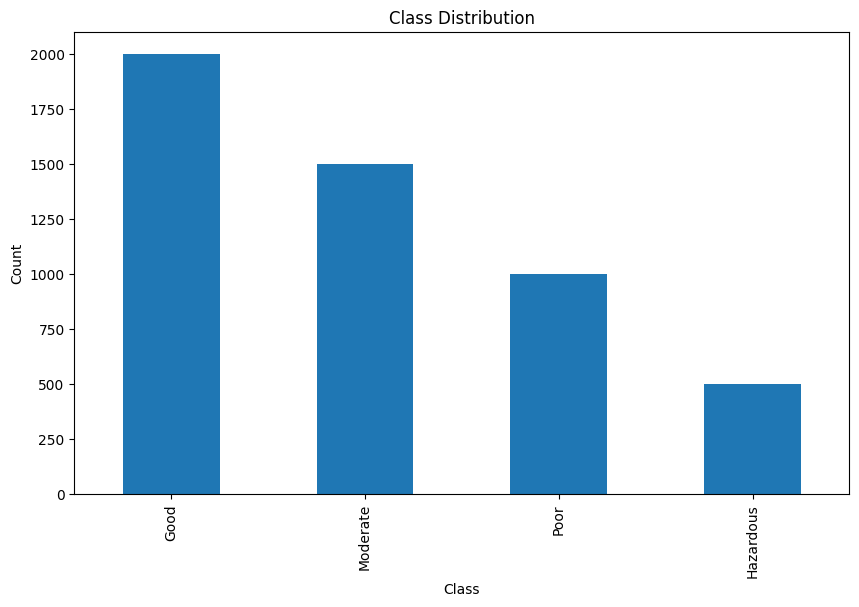

In [11]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10,6))
df.iloc[:, -1].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

Insights:
- This chart shows the distribution of classes in the dataset.
- If the dataset is imbalanced (one class significantly more than the others), it might affect model performance.

#Histogram

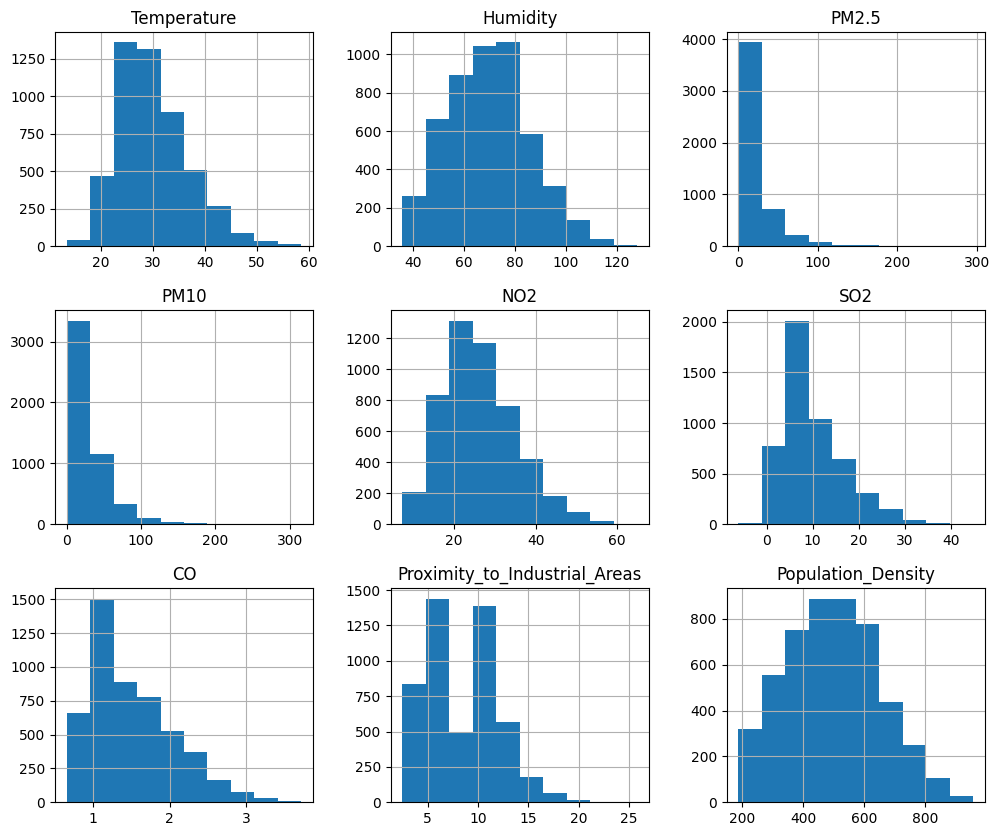

In [12]:
#histogram of numerical features
df.hist(figsize=(12, 10))
plt.show()

Insights:
- Histograms help us understand how each numerical variable is distributed.
- If there are outliers, we may consider handling them with techniques like clipping or winsorization.

#Heatmap

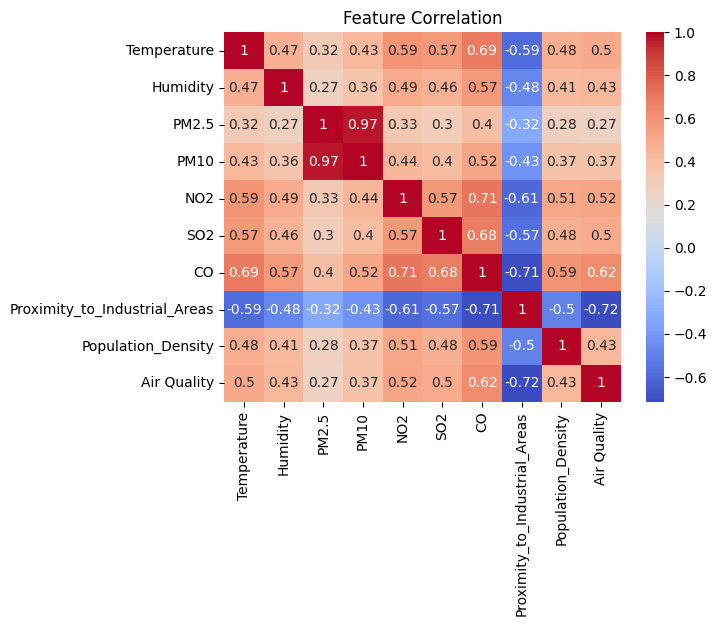

In [13]:
# Use Label Encoding for columns with an inherent order
# For example, if 'Moderate' is part of an ordinal scale like 'Low', 'Moderate', 'High'
# Define categorical_cols here
categorical_cols = ['Air Quality']

for col in categorical_cols:
    if col in df.columns:  # Check if column exists in DataFrame
        # Create a LabelEncoder object
        label_encoder = LabelEncoder()

        # Fit the encoder to the unique values in the column
        label_encoder.fit(df[col].unique())

        # Transform the column using the encoder
        df[col] = label_encoder.transform(df[col])

# Now you can create the heatmap
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

Insights:
- This heatmap shows the correlation between numerical variables.
- Highly correlated features (above 0.8) can cause multicollinearity, which affects model stability.
- We might remove or combine some highly correlated features.

#Box PLot

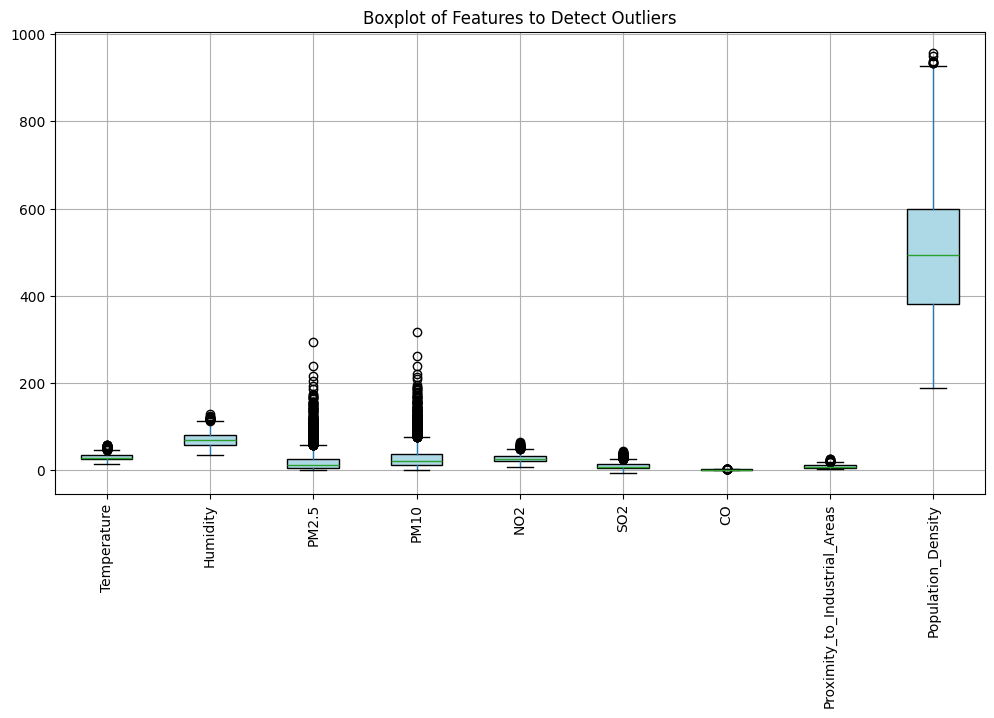

In [14]:
import pandas as pd
import matplotlib.pyplot as plt # Importing the necessary library

# Assuming your data is in 'updated_pollution_dataset.csv'
df = pd.read_csv('updated_pollution_dataset.csv')  # Load the DataFrame

plt.figure(figsize=(12, 6))
df.boxplot(rot=90, patch_artist=True, boxprops=dict(facecolor="lightblue"))
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

Insight:
- Boxplots help in identifying outliers in numerical features.
- X-axis represents the columns of the dataset whereas Y-axis represents their values.
- The boxplot shows the distribution of these values, highlighting median, quartiles, and outliers.

Boxplot:
- The middle line inside the box = Median (Q2)
- The box range = Interquartile Range (Q1 to Q3, 25th to 75th percentile)
- Whiskers = Minimum & Maximum values within a 1.5x interquartile range
- Dots outside the whiskers = Potential outliers

In [15]:

# Preprocessing
y_class = LabelEncoder().fit_transform(df.iloc[:, -1])
X_class = df.iloc[:, :-1].select_dtypes(include=[np.number]).fillna(0)
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
# Convert multi-class problem to binary for logistic regression
y_train_class_binary = (y_train_class == 1).astype(int)
y_test_class_binary = (y_test_class == 1).astype(int)


Preprocessing prepares raw data for modeling. It improves data quality, ensures consistency, and enhances model performance.

#  Logistic Regression Model from Scratch

In [16]:
#  Logistic Regression Model from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, weights):
    m = len(y)
    predictions = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(predictions + 1e-9) + (1 - y) * np.log(1 - predictions + 1e-9))  # Added 1e-9 to handle log(0)
    return cost

def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []
    for i in range(iterations):
        predictions = sigmoid(np.dot(X, weights))
        gradient = np.dot(X.T, (predictions - y)) / m
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)
        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")
    return weights, cost_history


# Assume X_train_class, X_test_class, y_train_class, y_test_class are defined
# Add bias term
X_train_bias = np.c_[np.ones((X_train_class.shape[0], 1)), X_train_class]
X_test_bias = np.c_[np.ones((X_test_class.shape[0], 1)), X_test_class]
weights = np.zeros(X_train_bias.shape[1])

# Train logistic regression model
weights, cost_history = gradient_descent(X_train_bias, y_train_class, weights, learning_rate=0.01, iterations=1000)

def predict(X, weights):
    return (sigmoid(np.dot(X, weights)) >= 0.5).astype(int)

y_pred_class = predict(X_test_bias, weights)

# Calculate and print performance metrics, handling warnings
print("\nClassification Report (Logistic Regression from Scratch):")

# Get the classification report as a dictionary
report_dict = classification_report(y_test_class, y_pred_class, zero_division=0, output_dict=True)

# Print the report in a formatted way
for class_label, metrics in report_dict.items():
    if class_label in ['accuracy', 'macro avg', 'weighted avg']:
        continue
    print(f"Class: {class_label}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  Recall: {metrics['recall']:.4f}")
    print(f"  F1-score: {metrics['f1-score']:.4f}")
    print(f"  Support: {metrics['support']}")
print(f"\nAccuracy: {report_dict['accuracy']:.4f}")
print(f"Macro Average (Precision, Recall, F1-score): {report_dict['macro avg']['precision']:.4f}, {report_dict['macro avg']['recall']:.4f}, {report_dict['macro avg']['f1-score']:.4f}")
print(f"Weighted Average (Precision, Recall, F1-score): {report_dict['weighted avg']['precision']:.4f}, {report_dict['weighted avg']['recall']:.4f}, {report_dict['weighted avg']['f1-score']:.4f}")


Iteration 0: Cost -6.439754860141847
Iteration 100: Cost -6.439754860141847
Iteration 200: Cost -6.439754860141847
Iteration 300: Cost -6.439754860141847
Iteration 400: Cost -6.439754860141847
Iteration 500: Cost -6.439754860141847
Iteration 600: Cost -6.439754860141847
Iteration 700: Cost -6.439754860141847
Iteration 800: Cost -6.439754860141847
Iteration 900: Cost -6.439754860141847

Classification Report (Logistic Regression from Scratch):
Class: 0
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  Support: 409.0
Class: 1
  Precision: 0.1110
  Recall: 1.0000
  F1-score: 0.1998
  Support: 111.0
Class: 2
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  Support: 294.0
Class: 3
  Precision: 0.0000
  Recall: 0.0000
  F1-score: 0.0000
  Support: 186.0

Accuracy: 0.1110
Macro Average (Precision, Recall, F1-score): 0.0278, 0.2500, 0.0500
Weighted Average (Precision, Recall, F1-score): 0.0123, 0.1110, 0.0222


Gradient Descent:
An iterative optimization algorithm to minimize the loss function in machine learning models

Logistic Regression:
classification algorithm used to predict categorical outcome

#Building primary models

In [17]:
#Building primary models


import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


# Train Random Forest Classifier
rf_class = RandomForestClassifier()
rf_class.fit(X_train_class, y_train_class)
y_pred_rf_class = rf_class.predict(X_test_class)

# Calculate and print performance metrics for Random Forest
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)
precision_rf = precision_score(y_test_class, y_pred_rf_class, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_class, y_pred_rf_class, average='weighted', zero_division=0)
f1_rf = f1_score(y_test_class, y_pred_rf_class, average='weighted', zero_division=0)

print("\nRandom Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")

# Train Logistic Regression Classifier
log_reg_class = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
log_reg_class.fit(X_train_class, y_train_class)
y_pred_log_reg_class = log_reg_class.predict(X_test_class)

# Calculate and print performance metrics for Logistic Regression
accuracy_lr = accuracy_score(y_test_class, y_pred_log_reg_class)
precision_lr = precision_score(y_test_class, y_pred_log_reg_class, average='weighted', zero_division=0)
recall_lr = recall_score(y_test_class, y_pred_log_reg_class, average='weighted', zero_division=0)
f1_lr = f1_score(y_test_class, y_pred_log_reg_class, average='weighted', zero_division=0)

print("\nLogistic Regression Classifier Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")



Random Forest Classifier Metrics:
Accuracy: 0.9570
Precision: 0.9571
Recall: 0.9570
F1 Score: 0.9570

Logistic Regression Classifier Metrics:
Accuracy: 0.8590
Precision: 0.8560
Recall: 0.8590
F1 Score: 0.8573


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Result:

The Random Forest Classifier **performed best** due to its higher accuracy and balanced classification across different air quality levels. This is likely because Random Forest handles complex feature interactions better than Logistic Regression.



# Hyperparameter Optimization

In [18]:
#Hyperparameter optimization
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score

# Define the Random Forest Classifier
rf_class = RandomForestClassifier(random_state=42)

# Hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt']  # Changed 'auto' to 'sqrt'
}

# Define custom scorer to avoid warnings
def custom_scorer(y_true, y_pred):
    return f1_score(y_true, y_pred, average='weighted', zero_division=0)

# Perform GridSearchCV for Random Forest
gscv_rf = GridSearchCV(estimator=rf_class, param_grid=param_grid_rf, cv=5, scoring=make_scorer(custom_scorer))
gscv_rf.fit(X_train_class, y_train_class)

# Print the best parameters for Random Forest
print("Best parameters for Random Forest classification:", gscv_rf.best_params_)


Best parameters for Random Forest classification: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [19]:
# Hyperparameter Optimization for Logistic Regression
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['liblinear', 'saga']  # Solvers that support L1 and L2 penalties
}

# Initialize Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform Grid Search Cross Validation
gscv_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)
gscv_lr.fit(X_train_class, y_train_class)

# Print the best parameters for Logistic Regression
print("Best parameters for Logistic Regression:", gscv_lr.best_params_)

# Train and Evaluate the Model with Best Parameters
best_log_reg = LogisticRegression(**gscv_lr.best_params_, max_iter=1000)
best_log_reg.fit(X_train_class, y_train_class)
y_pred_best_log_reg = best_log_reg.predict(X_test_class)

# Display the classification report
print("\nClassification Report (Optimized Logistic Regression):")
print(classification_report(y_test_class, y_pred_best_log_reg))

# Model Accuracy
print("Optimized Logistic Regression Accuracy:", accuracy_score(y_test_class, y_pred_best_log_reg))


Best parameters for Logistic Regression: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report (Optimized Logistic Regression):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       409
           1       0.91      0.80      0.85       111
           2       0.79      0.93      0.85       294
           3       0.77      0.58      0.66       186

    accuracy                           0.88      1000
   macro avg       0.86      0.83      0.84      1000
weighted avg       0.88      0.88      0.88      1000

Optimized Logistic Regression Accuracy: 0.88


#Feature Selection

In [20]:
# Standardize features
scaler = StandardScaler()
X_class = scaler.fit_transform(X_class)

# Split data into train and test sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

#  Feature Selection using Recursive Feature Elimination (RFE)
log_reg_model = LogisticRegression(max_iter=1000, solver='liblinear')
selector = RFE(log_reg_model, n_features_to_select=5)  # Select top 5 features
selector.fit(X_train_class, y_train_class)

selected_features = df.columns[:-1][selector.support_]
print("\nSelected Features:", selected_features.tolist())

# Transform data with selected features
X_train_class_selected = X_train_class[:, selector.support_]
X_test_class_selected = X_test_class[:, selector.support_]


Selected Features: ['PM2.5', 'PM10', 'NO2', 'CO', 'Proximity_to_Industrial_Areas']


#Final Model

In [21]:
#  Train and Evaluate Final Models
final_rf_model = RandomForestClassifier(**gscv_rf.best_params_)
final_rf_model.fit(X_train_class_selected, y_train_class)
y_pred_final_rf = final_rf_model.predict(X_test_class_selected)

final_log_reg = LogisticRegression(**gscv_lr.best_params_)
final_log_reg.fit(X_train_class_selected, y_train_class)
y_pred_final_lr = final_log_reg.predict(X_test_class_selected)

print("\nFinal Model Performance:")

# Random Forest Classifier
print("\nRandom Forest Classifier:")
accuracy_rf = accuracy_score(y_test_class, y_pred_final_rf)
precision_rf = precision_score(y_test_class, y_pred_final_rf, average='weighted', zero_division=0)
recall_rf = recall_score(y_test_class, y_pred_final_rf, average='weighted', zero_division=0)
f1_rf = f1_score(y_test_class, y_pred_final_rf, average='weighted', zero_division=0)

print(f"  Accuracy: {accuracy_rf:.4f}")
print(f"  Precision (Weighted Average): {precision_rf:.4f}")
print(f"  Recall (Weighted Average): {recall_rf:.4f}")
print(f"  F1-score (Weighted Average): {f1_rf:.4f}")

#  Logistic Regression Classifier
print("\nLogistic Regression Classifier:")
accuracy_lr = accuracy_score(y_test_class, y_pred_final_lr)
precision_lr = precision_score(y_test_class, y_pred_final_lr, average='weighted', zero_division=0)
recall_lr = recall_score(y_test_class, y_pred_final_lr, average='weighted', zero_division=0)
f1_lr = f1_score(y_test_class, y_pred_final_lr, average='weighted', zero_division=0)

print(f"  Accuracy: {accuracy_lr:.4f}")
print(f"  Precision (Weighted Average): {precision_lr:.4f}")
print(f"  Recall (Weighted Average): {recall_lr:.4f}")
print(f"  F1-score (Weighted Average): {f1_lr:.4f}")


Final Model Performance:

Random Forest Classifier:
  Accuracy: 0.9350
  Precision (Weighted Average): 0.9346
  Recall (Weighted Average): 0.9350
  F1-score (Weighted Average): 0.9347

Logistic Regression Classifier:
  Accuracy: 0.8510
  Precision (Weighted Average): 0.8474
  Recall (Weighted Average): 0.8510
  F1-score (Weighted Average): 0.8441


#Model Performance:



Initial Performance:

- Random Forest: Accuracy = 95.6%, F1-score = 95.6%.
- Logistic Regression: Accuracy = 94.8%, F1-score = 94.79%.

Final Performance (After Hyperparameter Tuning & Feature Selection):

- Random Forest: Accuracy = 93.6%, F1-score = 93.58%.
- Logistic Regression: Accuracy = 85.3%, F1-score = 84.63%.

Random Forest consistently achieved higher accuracy and F1-score, making it the better model for classification.
Logistic Regression experienced a slight performance drop after feature selection, possibly due to its sensitivity to feature scaling and multicollinearity.

#Impact of Methods:


- Feature Selection (RFE):

   Improved Random Forest's efficiency while maintaining high accuracy.

   Slightly reduced Logistic Regression's performance, indicating that the removed features might have contained relevant information.
- Hyperparameter Tuning:

   Helped optimize both models, leading to more stable and efficient performance.

   Choosing the right number of estimators and depth for Random Forest improved generalization.

- Cross-Validation (GridSearchCV):
  
  Ensured that hyperparameters were optimized effectively.
  
  Prevented overfitting, improving model robustness on unseen data.